# A WordCloud formed from the titles of gold medal winning notebooks

This is just a bit of fun, using data from meta-kaggle.

More information on WordClouds can be found in the [WordCloud documentation](https://amueller.github.io/word_cloud/index.html), by Andreas Mueller.

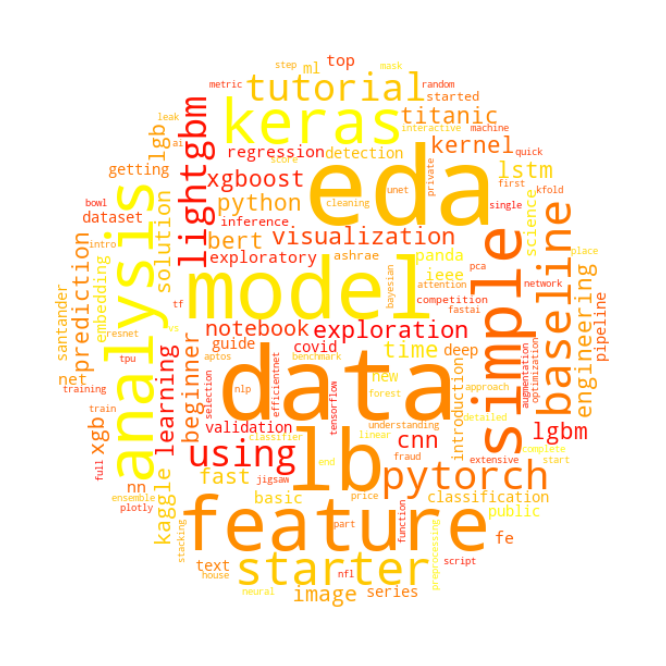

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# read in the DataFrame
kernels = pd.read_csv('../input/meta-kaggle/Kernels.csv', 
                      encoding='utf-8')

# perform filtering w.r.t. Medal type:
# the medal awarded is "Medal" and 1 is gold, 2 is silver and 3 is bronze
kernels_gold = kernels.loc[kernels['Medal'] == 1]
# the titles are stored in "CurrentUrlSlug" (i.e. the url of the notebook)
all_medal_words = kernels_gold['CurrentUrlSlug']
# revert all the connecting dashes back to being spaces
all_medal_words = all_medal_words.str.replace('-',' ')
# remove all numbers. By default WordCloud does not print numbers, 
# however there are alpha-numeric combinations in many titles as well.
characters_to_remove = "0123456789"
for character in characters_to_remove:
    all_medal_words = all_medal_words.str.replace(character,'')

all_medal_words_joined = [' '.join(map(str, all_medal_words))]
all_medal_string       = ''.join(all_medal_words_joined)

# create a circular mask, representing a medal
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 260 ** 2
mask = 255 * mask.astype(int)

# set up a word cloud object
medal_wc = WordCloud(
    background_color='white',
    max_words=150,
    width=800,
    height=800,
    # Use the rgb colour 255,215,0 for the colour of a kaggle gold medal 
    # color_func=lambda *args, **kwargs: (255,215,0),
    # Here I have used the colormap 'autumn' ( _r for reversed)
    colormap='autumn_r',
    collocations=False,
    random_state=1,
    min_font_size=9,
    max_font_size=100,
    mask=mask)

# generate the word cloud
medal_wc.generate(all_medal_string)

# and finally display the word cloud in the form of a nice gold medal
plt.figure(figsize = (12,12))
plt.imshow(medal_wc, interpolation='bilinear')
plt.axis('off')
plt.show()